<a href="https://colab.research.google.com/github/park-geun-hyeong/Computer_Vision/blob/main/CH1/Selectivesearch_%26_IoU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install tensorflow==1.13.1
! pip install keras==2.2.1 

  Using cached https://files.pythonhosted.org/packages/71/e3/19762fdfc62877ae9102edf6342d71b28fbfd9dea3d2f96a882ce099b03f/Keras_Applications-1.0.8-py3-none-any.whl
     |████████████████████████████████| 51kB 4.1MB/s 
ERROR: keras 2.2.1 has requirement keras-applications==1.0.4, but you'll have keras-applications 1.0.8 which is incompatible.
ERROR: keras 2.2.1 has requirement keras-preprocessing==1.0.2, but you'll have keras-preprocessing 1.1.2 which is incompatible.
  Found existing installation: Keras-Applications 1.0.4
    Uninstalling Keras-Applications-1.0.4:
      Successfully uninstalled Keras-Applications-1.0.4
  Found existing installation: Keras-Preprocessing 1.0.2
    Uninstalling Keras-Preprocessing-1.0.2:
      Successfully uninstalled Keras-Preprocessing-1.0.2
  Using cached https://files.pythonhosted.org/packages/71/26/1e778ebd737032749824d5cba7dbd3b0cf9234b87ab5ec79f5f0403ca7e9/Keras_Preprocessing-1.0.2-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/

In [2]:
import tensorflow as tf
import keras 

print(tf.__version__)
print(keras.__version__)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

1.13.1
2.2.1


Using TensorFlow backend.


In [3]:
! pip install selectivesearch

  Created wheel for selectivesearch: filename=selectivesearch-0.4-cp37-none-any.whl size=4359 sha256=d6be7fde87f42648d9bdc69d0dacd19d1680993be02535833e2f3868324d621a
  Stored in directory: /root/.cache/pip/wheels/ab/a0/bd/a56e017d10730401fce75f62ff9364004368b0b96f12c026ba
Successfully built selectivesearch


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import selectivesearch
import cv2
%matplotlib inline 

In [5]:
! git clone https://github.com/chulminkw/DLCV

Cloning into 'DLCV'...
remote: Enumerating objects: 75, done.
remote: Counting objects: 100% (75/75), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 234 (delta 32), reused 0 (delta 0), pack-reused 159
Receiving objects: 100% (234/234), 142.72 MiB | 7.99 MiB/s, done.
Resolving deltas: 100% (89/89), done.


In [6]:
import os 

os.getcwd()


'/content'

In [7]:
print(os.listdir('/content/DLCV/data/image'))
path = '/content/DLCV/data/image'

['beatles03.jpg', 'stopsign02.png', 'baseball01.jpg', 'beatles02.jpg', 'wave01.jpg', 'beatles01.jpg', 'audrey01.jpg', 'stopsign01.jpg', 'beatles_low.jpg', 'wave02.jpg', 'EPL01.jpg', 'john_wick01.jpg']


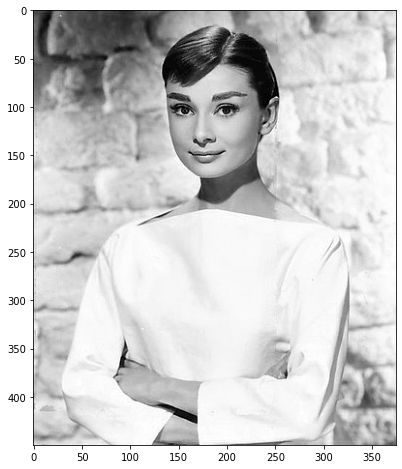

(450, 375, 3)


In [9]:
img = cv2.imread(path+'/audrey01.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,8))
plt.imshow(img)
plt.show()

print(img.shape)

In [10]:
_, region = selectivesearch.selective_search(img, scale=100, min_size=2000) #image의 region proposal정보를 반환

print(type(region),len(region))

<class 'list'> 41


### 반환된 region 변수는 리스트 타입으로 세부정보를 딕셔너리 형태로 가지고 있다.
- rect 값은 bounding box의 시작 x,y위치, 너비, 높이 값
- labels 값은 생성된 bounding box의 고유 id
- size값은 bounding 박스의 크기


In [11]:
region

[{'labels': [0.0], 'rect': (0, 0, 107, 167), 'size': 11166},
 {'labels': [1.0], 'rect': (15, 0, 129, 110), 'size': 8771},
 {'labels': [2.0], 'rect': (121, 0, 253, 133), 'size': 17442},
 {'labels': [3.0], 'rect': (134, 17, 73, 62), 'size': 2713},
 {'labels': [4.0], 'rect': (166, 23, 87, 176), 'size': 8639},
 {'labels': [5.0], 'rect': (136, 53, 88, 121), 'size': 4617},
 {'labels': [6.0], 'rect': (232, 79, 117, 147), 'size': 7701},
 {'labels': [7.0], 'rect': (50, 91, 133, 123), 'size': 7042},
 {'labels': [8.0], 'rect': (305, 97, 69, 283), 'size': 11373},
 {'labels': [9.0], 'rect': (0, 161, 70, 46), 'size': 2363},
 {'labels': [10.0], 'rect': (72, 171, 252, 222), 'size': 34467},
 {'labels': [11.0], 'rect': (0, 181, 118, 85), 'size': 5270},
 {'labels': [12.0], 'rect': (106, 210, 89, 101), 'size': 2868},
 {'labels': [13.0], 'rect': (302, 228, 66, 96), 'size': 2531},
 {'labels': [14.0], 'rect': (0, 253, 92, 134), 'size': 7207},
 {'labels': [15.0], 'rect': (153, 270, 173, 179), 'size': 10360},


In [13]:
only_rect = [i['rect'] for i in region]
only_rect

[(0, 0, 107, 167),
 (15, 0, 129, 110),
 (121, 0, 253, 133),
 (134, 17, 73, 62),
 (166, 23, 87, 176),
 (136, 53, 88, 121),
 (232, 79, 117, 147),
 (50, 91, 133, 123),
 (305, 97, 69, 283),
 (0, 161, 70, 46),
 (72, 171, 252, 222),
 (0, 181, 118, 85),
 (106, 210, 89, 101),
 (302, 228, 66, 96),
 (0, 253, 92, 134),
 (153, 270, 173, 179),
 (0, 305, 47, 139),
 (104, 312, 80, 71),
 (84, 360, 91, 67),
 (0, 362, 171, 87),
 (297, 364, 77, 85),
 (0, 91, 183, 175),
 (136, 23, 117, 176),
 (72, 171, 254, 278),
 (134, 17, 119, 182),
 (302, 97, 72, 283),
 (121, 0, 253, 226),
 (0, 91, 183, 175),
 (0, 0, 144, 167),
 (0, 0, 253, 199),
 (0, 253, 92, 191),
 (0, 91, 183, 353),
 (0, 171, 326, 278),
 (0, 97, 374, 352),
 (84, 312, 100, 115),
 (0, 91, 184, 353),
 (0, 91, 195, 353),
 (0, 0, 374, 444),
 (0, 0, 374, 449),
 (0, 0, 374, 449),
 (0, 0, 374, 449)]

## boundig box 시각화

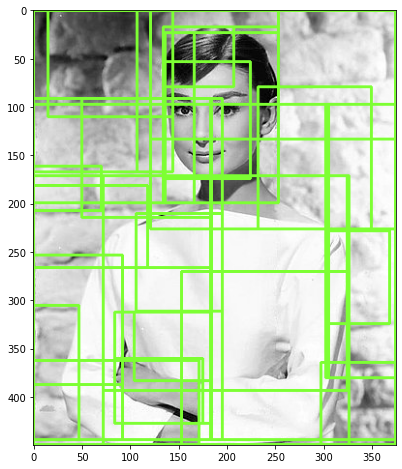

In [16]:
green_rgb=(125,255,51) #boundig box의 color 지정
img_copy = img.copy()

for rect in only_rect: #rect는 bounding box의 좌상단 좌표와 width,height 정보를 가지고 있다.

    left = rect[0]
    top = rect[1]

    right = left+rect[2]
    bottom = top + rect[3]

    img_copy = cv2.rectangle(img_copy, (left,top),(right,bottom), color=green_rgb, thickness=2)
    ## cv2의 rectengle함수는 bounding box의 좌상단, 우하단 좌표를 입력해준다. 

plt.figure(figsize=(8,8))
plt.imshow(img_copy)
plt.show()

## 크기가 큰 bounding box만 시각화

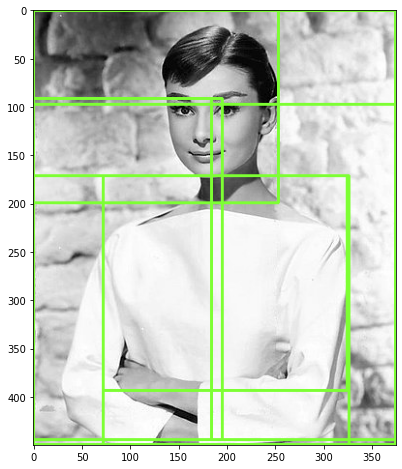

In [19]:
only_big_rect = [i['rect'] for i in region if i['size'] > 30000]


green_rgb=(125,255,51) #boundig box의 color 지정
img_copy = img.copy()

for rect in only_big_rect: #rect는 bounding box의 좌상단 좌표와 width,height 정보를 가지고 있다.

    left = rect[0]
    top = rect[1]

    right = left+rect[2]
    bottom = top + rect[3]

    img_copy = cv2.rectangle(img_copy, (left,top),(right,bottom), color=green_rgb, thickness=2)
    ## cv2의 rectengle함수는 bounding box의 좌상단, 우하단 좌표를 입력해준다. 

plt.figure(figsize=(8,8))
plt.imshow(img_copy)
plt.show()

## IoU 평가

In [41]:
def compute_iou(cand_box, gt_box): ## 예측과,실제 bounding box의 좌상단 우하단 좌표가 매개변수로 들어간다.

    x1 = np.maximum(cand_box[0],gt_box[0])
    y1 = np.maximum(cand_box[1],gt_box[0])
    x2 = np.minimum(cand_box[2],gt_box[2])
    y2 = np.minimum(cand_box[3],gt_box[3])

    intersection = np.maximum(x2-x1,0) * np.maximum(y2-y1,0)

    cand_box_area = (cand_box[2]-cand_box[0])*(cand_box[3]-cand_box[1])
    gt_box_area = (gt_box[2]-gt_box[0])*(gt_box[3]-gt_box[1])

    iou = intersection / (cand_box_area + gt_box_area - intersection)

    return iou

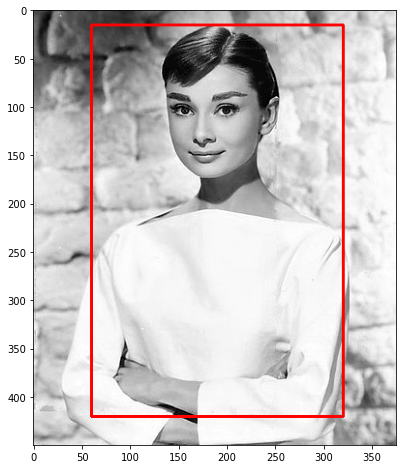

In [35]:
gt_box = [60,15,320,420] # 임의로 지정한 gt_box

img_copy2 = img.copy()
red = (255,0,0)

img_copy2 = cv2.rectangle(img_copy2, (60,15), (320,420), color=red, thickness=2)

plt.figure(figsize=(8,8))
plt.imshow(img_copy2)
plt.show()

In [46]:
for idx, rect in enumerate(only_rect):
    rect = list(rect)
    rect[2] = rect[0]+rect[2]
    rect[3] = rect[1]+rect[3] 

    iou = compute_iou(rect,gt_box)

    print("idx: {}, iou: {}".format(idx,np.round(iou,4)))

idx: 0, iou: 0.0426
idx: 1, iou: 0.0364
idx: 2, iou: 0.1168
idx: 3, iou: 0.0128
idx: 4, iou: 0.1114
idx: 5, iou: 0.0947
idx: 6, iou: 0.1181
idx: 7, iou: 0.142
idx: 8, iou: 0.0352
idx: 9, iou: 0.0043
idx: 10, iou: 0.5185
idx: 11, iou: 0.0447
idx: 12, iou: 0.0854
idx: 13, iou: 0.0157
idx: 14, iou: 0.0378
idx: 15, iou: 0.2252
idx: 16, iou: 0.0
idx: 17, iou: 0.0539
idx: 18, iou: 0.0515
idx: 19, iou: 0.0566
idx: 20, iou: 0.0117
idx: 21, iou: 0.1859
idx: 22, iou: 0.1483
idx: 23, iou: 0.5409
idx: 24, iou: 0.1498
idx: 25, iou: 0.0422
idx: 26, iou: 0.2552
idx: 27, iou: 0.1859
idx: 28, iou: 0.0747
idx: 29, iou: 0.2083
idx: 30, iou: 0.0455
idx: 31, iou: 0.3127
idx: 32, iou: 0.4935
idx: 33, iou: 0.549
idx: 34, iou: 0.1019
idx: 35, iou: 0.3151
idx: 36, iou: 0.3424
idx: 37, iou: 0.5266
idx: 38, iou: 0.5211
idx: 39, iou: 0.5211
idx: 40, iou: 0.5211


In [56]:
cand_rect = [i['rect'] for i in region if i['size']>10000]
cand_rect.sort()

idx: 3, iou: 0.5266
idx: 4, iou: 0.5211
idx: 5, iou: 0.5211
idx: 6, iou: 0.5211
idx: 12, iou: 0.549
idx: 15, iou: 0.5185
idx: 16, iou: 0.5409


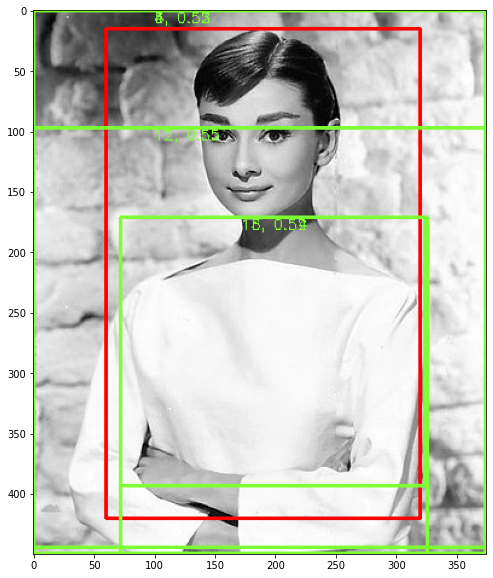

In [55]:
gt_box = [60,15,320,420] # 임의로 지정한 gt_box

img_copy = img.copy()
red = (255,0,0)

img_rgb = cv2.rectangle(img_copy, (60,15), (320,420), color=red, thickness=2)

for idx, rect in enumerate(cand_rect):
    rect = list(rect)
    rect[2] = rect[0]+rect[2]
    rect[3] = rect[1]+rect[3] 

    iou = compute_iou(rect,gt_box)

    if iou > 0.5:
        print("idx: {}, iou: {}".format(idx,np.round(iou,4)))
        cv2.rectangle(img_rgb,(rect[0],rect[1]), (rect[2],rect[3]),color=green_rgb, thickness=2 )
        text = "{}, {:.2f}".format(idx,iou)
        cv2.putText(img_rgb, text,(rect[0]+100, rect[1]+10),cv2.FONT_HERSHEY_SIMPLEX,0.4,color = green_rgb,thickness=1 )


plt.figure(figsize=(10,10))
plt.imshow(img_rgb)
plt.show()